In [5]:
text = "You say goodbye and I say hello."

In [6]:
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [8]:
words =text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

위와같이 온점을 분할할때 앞에 공백을 넣어주는 임시변통 방법뿐만아니라, 정규표현식을 이용하여
`re.split('(\W+)?'.text)`라고 호출하면 단어단위로 분할할 수 있다.

In [9]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [10]:
print(id_to_word)
print(word_to_id)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [2]:
import numpy as np 
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
(corpus)


NameError: name 'words' is not defined

In [3]:
import sys
sys.path.append('...')
import numpy as np 
from common.util import preprocess

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [4]:
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0],
],dtype=np.int32)

print(C[0])
print(C[4])
print(C[word_to_id['goodbye']]) #goodbye의 벡터표현



[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [7]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus,vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i'] ]
print(cos_similarity(c0, c1))



0.7071067691154799


In [8]:
from common.util import most_similar

most_similar('you',word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [9]:
from common.util import ppmi

W = ppmi(C)

np.set_printoptions(precision=3) #유효자리수를 세자리로 표시
print("동시발생 행렬")
print(C)
print('-'*50)
print("PPMI")
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [10]:
U, S, V = np.linalg.svd(W)

In [16]:
print(C[0]) #동시발생 행렬
print(W[0]) #PPMI 행렬
print(U[0]) #SVD
print(U[0,:2])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
 -2.426e-17]
[0.    0.341]


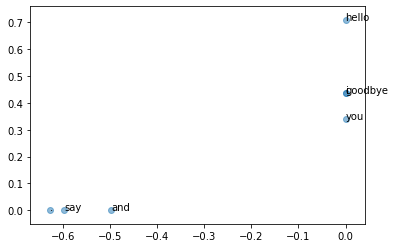

In [18]:
import matplotlib.pyplot as plt 
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) #2차원그래프상에서 좌표 (x,y) 지점에 word에 담긴 텍스트를 그린다.

plt.scatter(U[:,0],U[:,1], alpha = 0.5)
plt.show()

In [22]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train') #train, test, valid (훈련용, 테스트, 검증)

print("말뭉치 크기: ", len(corpus))
print("corpus[:30]: ", corpus[:30])
print()
print("id_to_word[0]: ", id_to_word[0])
print("id_to_word[1]: ", id_to_word[1])
print("id_to_word[2]: ", id_to_word[2])

print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])


Done
말뭉치 크기:  929589
corpus[:30]:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]:  aer
id_to_word[1]:  banknote
id_to_word[2]:  berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [ ]:
window_size = 2
wordvec_size = 100

corpus,word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print("동시ㅂ라생 수 계산")
C = create_co_matrix(corpus, vocab_size, window_size)
print("PPMI 계산 ...")
W = ppmi(C, verbose=True)
print("SVD 계산")

try:
    #Truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_compontns= wordvec_size, n_iter=5, random_state=None)
except ImportError:
    U,S,V = np.linalg.svd(W)

word_vesc = U[:, :wordvec_size]

querys = ['you', 'year', 'car','toyota']

for query in querys:
    most_similay(query,word_to_id, id_to_word, word_vesc, top= 5)
